In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Download / read data from this source: https://www.kaggle.com/datasets/lainguyn123/student-performance-factors
file_path = r"D:\\MSCDAD\\Data Mining & machine Learning\\Project\\StudentPerformanceFactors.csv"
df = pd.csv_read(file_path)
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [16]:
# Check for basic information about the dataset
df.info()

# Get basic statistics for numerical columns
df.describe()

# Check for missing values
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Hours_Studied               6607 non-null   float64
 1   Attendance                  6607 non-null   float64
 2   Parental_Involvement        6607 non-null   int64  
 3   Access_to_Resources         6607 non-null   object 
 4   Extracurricular_Activities  6607 non-null   object 
 5   Sleep_Hours                 6607 non-null   float64
 6   Previous_Scores             6607 non-null   int64  
 7   Motivation_Level            6607 non-null   object 
 8   Internet_Access             6607 non-null   object 
 9   Tutoring_Sessions           6607 non-null   int64  
 10  Family_Income               6607 non-null   object 
 11  Teacher_Quality             6529 non-null   object 
 12  Peer_Influence              6607 non-null   object 
 13  Physical_Activity           6607 

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Exam_Score                     0
School_Type_Public             0
Gender_Male                    0
dtype: int64

In [13]:
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
import pandas as pd

# DATA PREPROCESSING
# Label encoding for ordinal variables
le = LabelEncoder()
columns_to_encode = ['Access_to_Resources',	'Extracurricular_Activities',	'Sleep_Hours',	'Previous_Scores',	'Motivation_Level',	'Internet_Access',	'Tutoring_Sessions',	'Family_Income',	'Teacher_Quality',	'School_Type',	'Peer_Influence',	'Physical_Activity',	'Learning_Disabilities',	'Parental_Education_Level',	'Distance_from_Home',	'Gender']
df[['Access_to_Resources',	'Extracurricular_Activities',	'Sleep_Hours',	'Previous_Scores',	'Motivation_Level',	'Internet_Access',	'Tutoring_Sessions',	'Family_Income',	'Teacher_Quality',	'School_Type',	'Peer_Influence',	'Physical_Activity',	'Learning_Disabilities',	'Parental_Education_Level',	'Distance_from_Home',	'Gender']] = le.fit_transform(df[['Access_to_Resources',	'Extracurricular_Activities',	'Sleep_Hours',	'Previous_Scores',	'Motivation_Level',	'Internet_Access',	'Tutoring_Sessions',	'Family_Income',	'Teacher_Quality',	'School_Type',	'Peer_Influence',	'Physical_Activity',	'Learning_Disabilities',	'Parental_Education_Level',	'Distance_from_Home',	'Gender']])

# One-hot encoding for nominal variables
df = pd.get_dummies(df, columns=['School_Type', 'Gender'], drop_first=True)

# Scaling numerical features
scaler = StandardScaler()
df[['Hours_Studied', 'Attendance', 'Sleep_Hours']] = scaler.fit_transform(df[['Hours_Studied', 'Attendance', 'Sleep_Hours']])


KeyError: "['School_Type', 'Gender'] not in index"

In [17]:
# One-hot encoding for categorical columns
df_encoded = pd.get_dummies(df, drop_first=True)


In [14]:
# Correlation matrix for numerical features
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.show()


ValueError: could not convert string to float: 'High'

<Figure size 1000x800 with 0 Axes>

In [18]:
print(df_encoded)

      Hours_Studied  Attendance  Parental_Involvement  Sleep_Hours  \
0          0.504942    0.348375                     1    -0.019796   
1         -0.162822   -1.383736                     1     0.661399   
2          0.671882    1.560853                     2    -0.019796   
3          1.506587    0.781403                     1     0.661399   
4         -0.162822    1.041220                     2    -0.700990   
...             ...         ...                   ...          ...   
6602       0.838823   -0.950708                     0    -0.019796   
6603       0.504942   -0.344469                     0     0.661399   
6604       0.004119    0.868009                     2    -0.700990   
6605      -1.665291    0.521587                     0    -0.700990   
6606      -0.830586   -1.123919                     2     1.342594   

      Previous_Scores  Tutoring_Sessions  Physical_Activity  Exam_Score  \
0                  73                  0                  3          67   
1        

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


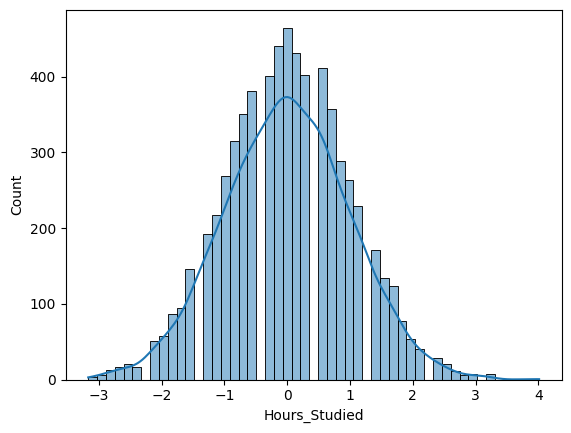

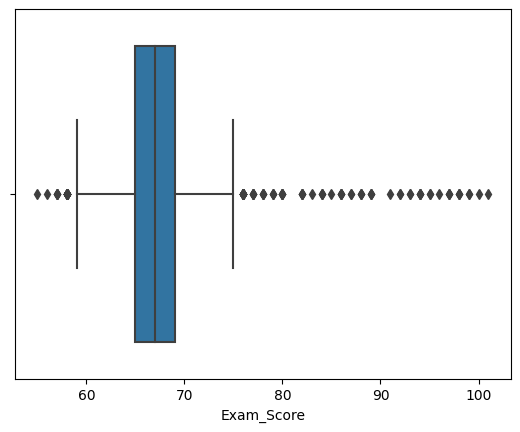

In [32]:
# Histogram for 'Hours_Studied'
sns.histplot(df_encoded['Hours_Studied'], kde=True)
plt.show()

# Boxplot for 'Exam_Score'
sns.boxplot(x=df_encoded['Exam_Score'])
plt.show()


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


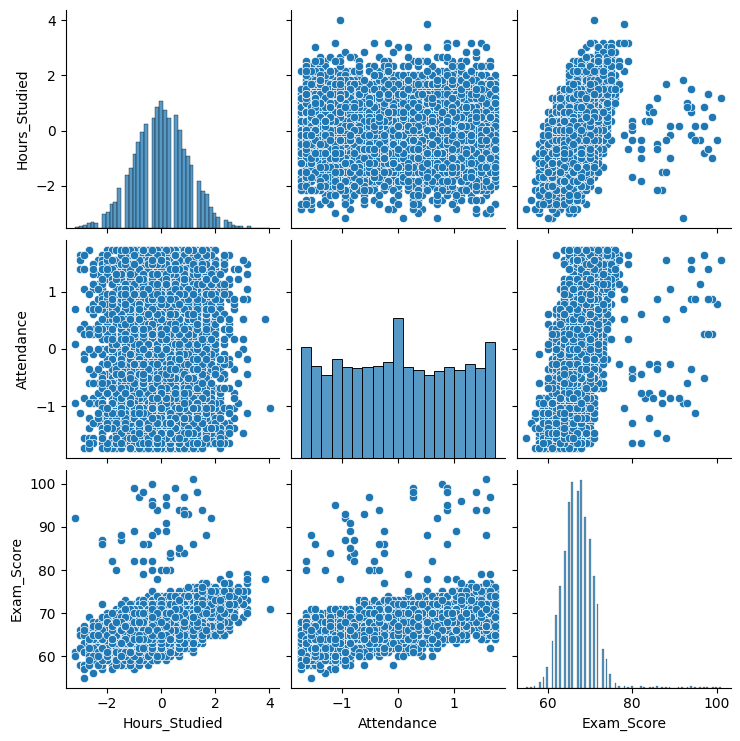

In [21]:
sns.pairplot(df[['Hours_Studied', 'Attendance', 'Motivation_Level', 'Exam_Score']])
plt.show()


In [23]:
# Fill missing values with median (for numerical columns)
df_encoded.fillna(df_encoded.median(), inplace=True)

# Fill missing values for categorical columns (with mode)
df_encoded.fillna(df.mode().iloc[0], inplace=True)


**Splitting the test and train data**

In [24]:
from sklearn.model_selection import train_test_split

X = df_encoded.drop('Exam_Score', axis=1)  # Features
y = df_encoded['Exam_Score']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


**Model 1: Linear Regression**

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R2 Score: {r2}')


Mean Squared Error: 3.574960675289443
R2 Score: 0.747085790886179


**Model 2: KNN**

In [30]:
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# For Regression
model = KNeighborsRegressor(n_neighbors=30)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'MSE: {mse}')

# For Classification
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix: \n{cm}')


MSE: 6.84721297697092
Accuracy: 0.1550680786686838
Confusion Matrix: 
[[ 0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0]
 [ 0  0  0  0  0  0  1  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0]
 [ 0  0  1  0  0  1  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0]
 [ 0  1  1  0  1  0  1  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0]
 [ 0  0  0  2  1  2  0  3  3  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0]
 [ 0  0  0  0  0  6  6  4  4  4  1  0  1  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0]
 [ 0  0  0  3  2  9  6  7 11  9  3  2  2  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0]
 [ 0  0  2  3  3  9 13 13  5 10  9  6  3  1  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0]
 [ 0  0  0  3  1  4 12 10 16 20 16  4  2  4  2  0  0  0  0  0  0  0  0  0
   0  0  0  0  0]
 [ 0  0  1  1  3 10 11 16 18 31 22 21  9  3  2  0  0  0  0  0  0  0  0  0
   0  0  0  0  0]
 [ 0  0  0

**Naive Bayes**

In [27]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix

model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix: \n{cm}')


Accuracy: 0.029500756429652043
Confusion Matrix: 
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


SVM

In [28]:
from sklearn.svm import SVR, SVC
from sklearn.metrics import accuracy_score, confusion_matrix

# For Regression (Support Vector Regression)
model = SVR(kernel='rbf')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'MSE: {mse}')

# For Classification (Support Vector Classification)
model = SVC(kernel='rbf')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix: \n{cm}')


MSE: 7.999873679305003
Accuracy: 0.11119515885022693
Confusion Matrix: 
[[  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   2   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   5   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  13   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  26   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  54   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  77   0   0   0   0   0
    0  